**Assignment - Capstone Project**

**Debargha Samadder**

**u3262156**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Capstone_Project/

/content/drive/MyDrive/Capstone_Project


In [5]:
!ls

car_price_prediction.csv


In [84]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')




*  It contains the details of 19237 cars.

*   My project task is to create a machine learning model which can predict the average price of cars based on its characteristics.
*  For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes









# **Step 1: Reading the data with python**


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Add this line to import the plotting library

CarData = pd.read_csv('/content/drive/MyDrive/Capstone_Project/car_price_prediction.csv', encoding='latin')
print('Shape before deleting duplicate values:', CarData.shape)

# Removing duplicate rows if any
CarData = CarData.drop_duplicates()
print('Shape After deleting duplicate values:', CarData.shape)


%matplotlib inline

CarData['Levy'] = CarData['Levy'].replace('-', np.nan).astype(float)

CarData['Mileage'] = CarData['Mileage'].str.replace(' km', '')
CarData['Mileage'] = CarData['Mileage'].astype(float)

CarData['Engine volume'] = CarData['Engine volume'].str.replace(' Turbo', '')
CarData['Engine volumes'] = CarData['Engine volume'].astype(float)
# Calculate the log of prices now that there are no zero values
CarData['Log_Price'] = np.log(CarData['Price'])

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
print(CarData.head(10))



Shape before deleting duplicate values: (19237, 18)
Shape After deleting duplicate values: (18924, 18)
         ID  Price    Levy Manufacturer     Model  Prod. year   Category  \
0  45654403  13328  1399.0        LEXUS    RX 450        2010       Jeep   
1  44731507  16621  1018.0    CHEVROLET   Equinox        2011       Jeep   
2  45774419   8467     NaN        HONDA       FIT        2006  Hatchback   
3  45769185   3607   862.0         FORD    Escape        2011       Jeep   
4  45809263  11726   446.0        HONDA       FIT        2014  Hatchback   
5  45802912  39493   891.0      HYUNDAI  Santa FE        2016       Jeep   
6  45656768   1803   761.0       TOYOTA     Prius        2010  Hatchback   
7  45816158    549   751.0      HYUNDAI    Sonata        2013      Sedan   
8  45641395   1098   394.0       TOYOTA     Camry        2014      Sedan   
9  45756839  26657     NaN        LEXUS    RX 350        2007       Jeep   

  Leather interior Fuel type Engine volume   Mileage  Cylind

<ipython-input-7-84d064ebaa03>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarData['Levy'] = CarData['Levy'].replace('-', np.nan).astype(float)
<ipython-input-7-84d064ebaa03>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarData['Mileage'] = CarData['Mileage'].str.replace(' km', '')
<ipython-input-7-84d064ebaa03>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

**Key observations from Step 1 about Data Description**



*  This file contains 19237 house details from the Boston city.
*  There are 18 attributes and they are outlined below.


*  ID: The unique identifier assigned to each car in a dataset or database, used for tracking and referencing specific cars.

*  Price: The cost at which the car is offered for sale or purchase.

* Levy: Any additional charge or fee imposed on the car, often by the government or regulatory bodies, such as taxes or import levies.

*
Manufacturer: The company or entity that produces or assembles the car.

*  Model: The specific version or variant of the car produced by the manufacturer, often distinguished by features such as design, engine specifications, and trim levels.

*  Prod. year: The year in which the car was manufactured.

*  Category: The classification of the car based on its size, body style, or intended use, such as sedan, SUV, hatchback, etc.

*  Leather interior: Indicates whether the car's interior is furnished with leather materials or not

*  
Fuel type: The type of fuel the car is designed to use, such as gasoline/petrol, diesel, hybrid, electric, etc.

*   Engine volume: The capacity of the car's engine, usually measured in liters or cubic centimeters (cc), indicating the total volume of all cylinders in the engine.

*  Mileage: The total distance traveled by the car, typically measured in miles or kilometers, indicating its usage.

*  Cylinders: The number of cylinders in the car's engine, which affects performance and fuel efficiency.
*   
Gear box type: The type of transmission system used in the car, such as manual, automatic, or continuously variable transmission (CVT).


*   
Drive wheels: The wheels responsible for propelling the car forward, categorized as front-wheel drive (FWD), rear-wheel drive (RWD), all-wheel drive (AWD), or four-wheel drive (4WD).


*  Doors: The number of entry points into the car, including both passenger and cargo doors.


*  Wheel: The type and size of wheels installed on the car, including factors such as diameter and material.


*   Color: The exterior color of the car, representing its visual appearance.

*   Airbags: Safety features installed in the car to protect occupants in the event of a collision, indicating the number and location of airbags within the vehicle.





# **Step 2 : Problem Statement Definition**


*   Creating a prediction model to predict the price of a car.
*   Target Variable: Price
*   Predictors/Features: Levy, Manufacturer, Model,	Prod. year,	Category	 etc



#**Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.**


*   Based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continuous.


In [8]:
# Importing necessary libraries
import pandas as pd

# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project/car_price_prediction.csv')

# Displaying the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Displaying information about the dataset including data types
print("\nDataframe information:")
print(df.info())

# Identifying (and )the continuous target variable
print("\nContinuous target variable:")
for column in df.columns:
    if df[column].dtype in ['int64', 'float64'] and column != 'ID':
        print("- Target variable:", column)
        break


First 5 rows of the dataset:
         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left 

#**Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.)**






*   If target variable's distribution is too skewed then the predictive modeling will lead to poor results.

*   Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
*   When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.

*   Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.



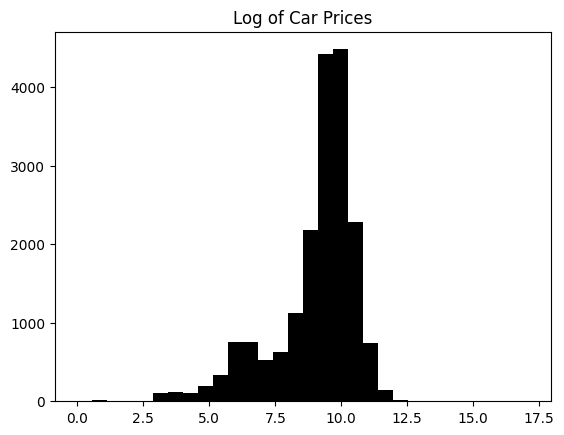

In [9]:

# Plotting the transformed prices
plt.hist(CarData['Log_Price'], bins=30, color='black')
plt.title('Log of Car Prices')
plt.show()

Observations from Step 4
The data distribution of the target variable ispositively skewed so this might affect final machine learning result.
There are sufficient number of rows for each type of values to learn from.
Transoformation can be applied next in an attempt to make the data distribution more symmetiric.

#**Step 5: Basic Exploratory Data Analysis**





*   This step is performed to guage the overall data.
*   The volume of data, the types of columns present in the data.
*   Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.
*   This step helps to start the column/data rejection process.
*   You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
*   For example in this dataset, you will ask, does this column affect the price of the house?
*   If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.
*   There are four commands which are used for Basic data exploratory Analysis in Python
*   head() : This helps to see a few sample rows of the data
*   info() : This provides the summarized information of the data
*   nunique(): This helps us to identify if a column is categorical or
continuous
*   describe() : This provides the descriptive statistical details of the data



































In [10]:
# Looking at sample rows in the data
CarData.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volumes,Log_Price
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,9.497622
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,9.718422
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,9.043932
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,8.190632
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,9.369564


In [11]:
# Looking at sample rows in the data
CarData.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volumes,Log_Price
19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0,9.043932
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4,9.660205
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2.0,10.169997
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,2.0,8.581294
19236,45813273,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923.0,4.0,Automatic,Front,04-May,Left wheel,White,12,2.4,6.152733


In [12]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
CarData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              13215 non-null  float64
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  float64
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [13]:
# Looking at the descriptive statistics of the data
CarData.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volumes,Log_Price
count,1.892400e+04,1.892400e+04,13215.000000,18924,18924,18924.000000,18924,18924,18924,18924,1.892400e+04,18924.000000,18924,18924,18924,18924,18924,18924.000000,18924.000000,18924.000000
unique,NaN,NaN,NaN,65,1590,NaN,11,2,7,70,NaN,NaN,4,3,3,2,16,NaN,NaN,NaN
top,NaN,NaN,NaN,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,NaN,NaN,Automatic,Front,04-May,Left wheel,Black,NaN,NaN,NaN
freq,NaN,NaN,NaN,3729,1069,NaN,8600,13731,9944,3856,NaN,NaN,13282,12695,18032,17471,4944,NaN,NaN,NaN
mean,4.557538e+07,1.858744e+04,906.299205,NaN,NaN,2010.914236,NaN,NaN,NaN,NaN,1.555373e+06,4.580216,NaN,NaN,NaN,NaN,NaN,6.568379,2.306251,9.027795
std,9.375468e+05,1.921356e+05,463.296871,NaN,NaN,5.665749,NaN,NaN,NaN,NaN,4.880221e+07,1.200223,NaN,NaN,NaN,NaN,NaN,4.322323,0.877591,1.588994
min,2.074688e+07,1.000000e+00,87.000000,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,4.569501e+07,5.331000e+03,640.000000,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,7.019575e+04,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,1.800000,8.581294
50%,4.577191e+07,1.317200e+04,781.000000,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,1.264000e+05,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000,2.000000,9.485849
75%,4.580174e+07,2.206300e+04,1058.000000,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,1.891198e+05,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000,2.500000,10.001657


In [14]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
CarData.nunique()

ID                  18924
Price                2315
Levy                  558
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume          70
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
Engine volumes         65
Log_Price            2315
dtype: int64

# **Step 6: Data Classfication from analysis**
* Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column.
* Hence, creating a initial roadmap for further analysis.

* The selected columns in this step are not final, further study will be done and then a final list will be created

* ID                     Continuous. Selected.
* Price                  Continuous. Selected.
* Levy                   Continuous. Selected.
* Manufacturer           Continuous. Selected.
* Model                  Continuous. Selected.
* Prod. year             Continuous. Selected.
* Category               Categorical. Selected.
* Leather interior       Categorical. Selected.
* Fuel type              Categorical. Selected.
* Engine volume          Continuous. Selected.
* Mileage                Continuous. Selected.
* Cylinders              Categorical. Selected.
* Gear box type          Categorical. Selected.
* Drive wheels           Categorical. Selected.
* Doors                  Categorical. Selected.
* Wheel                  Categorical. Selected.
* Color                  Categorical. Selected.
* Airbags                Categorical. Selected.


#**Step 7: Removing Unwanted columns**


*   For regression analysis, qualitative columns create problems.

*   The ID column in the data is irrelevant to price of car.
Hence we need to remove the column ID.


*   The Column 'Color' is removed because from a logical standpoint color cannot affect the price of a car so this might affect other results.
*   The Column 'Door' is removed because it contains invalid value which is irrelvant to the subjects and has no connection to cars









In [15]:
CarData = CarData.drop(['ID', 'Color', 'Doors'], axis=1)

#**Step 8: Visual Exploratory Data Analysis**
 Visualize distribution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step, we could spotted ten categorical predictors in the data
* Categorical Predictors:
'Category', ‘Leather interior’,'Fuel Type','Cylinders','Gear Box Types','Drive Wheels','Doors','Wheel''Color' ,'Airbags'

* We will use bar charts to see how the data is distributed for these categorical columns.

In [16]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(35,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


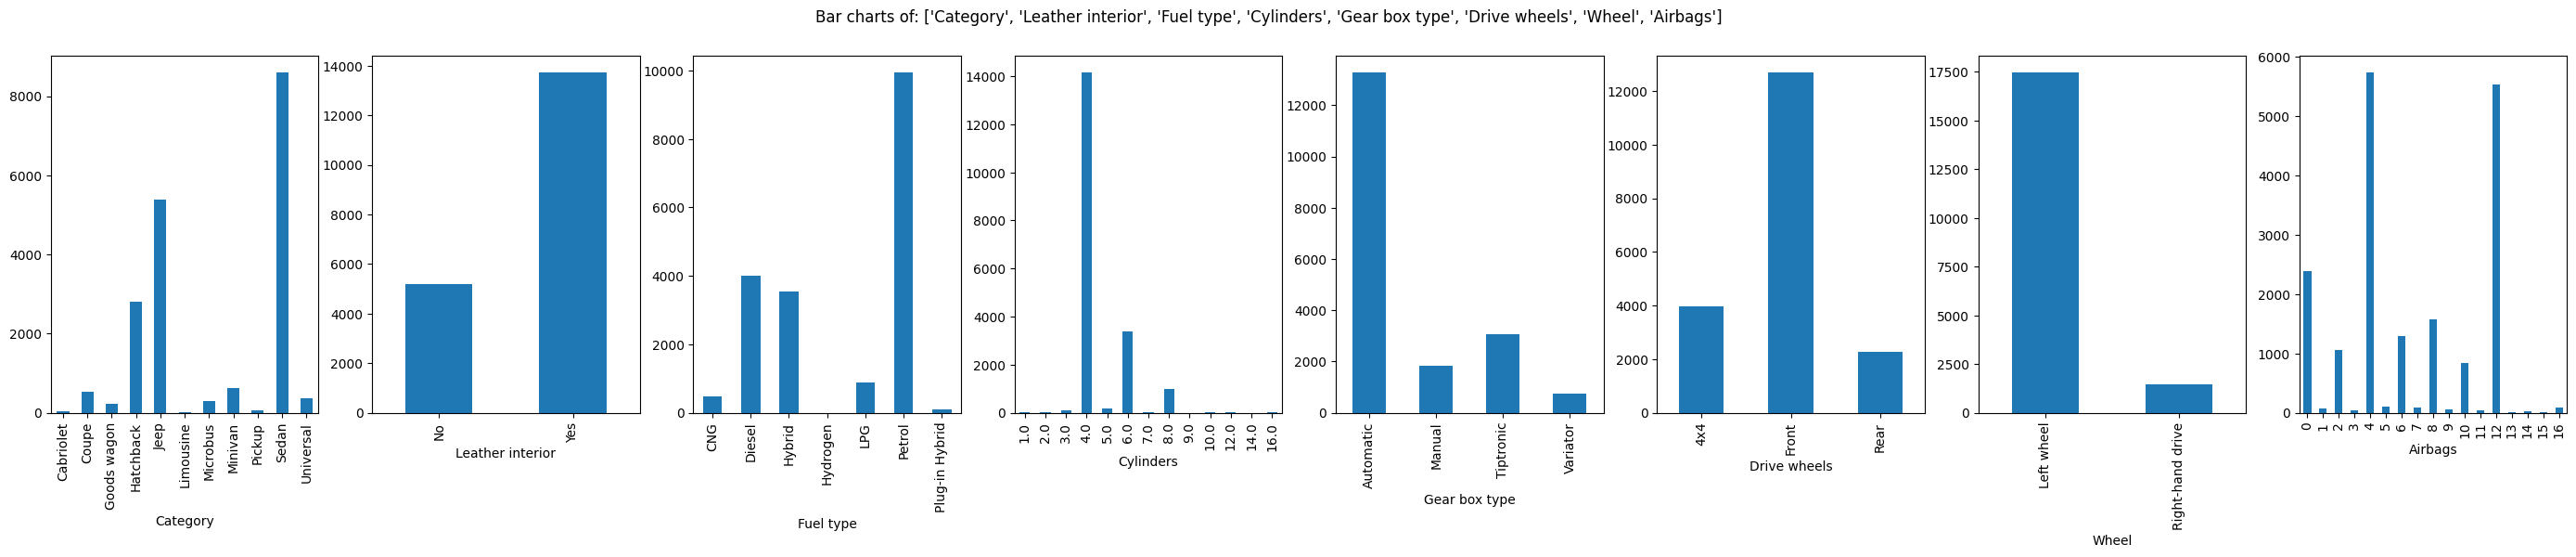

In [ ]:
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=CarData, colsToPlot=['Category','Leather interior',
                                             'Fuel type','Cylinders',
                                             'Gear box type','Drive wheels',
                                             'Wheel','Airbags'])

**Observations from Step 8 - Visual Exploratory Data Analysis**

Bar Charts have allowed interpretation on the two data columns

The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. * Hence, there are enough rows for each category in the data for the ML/AI regression algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers.

These kind of columns may not be very helpful in machine learning model development.

We can confirm this with the correlation analysis step coming up, and take a final call to select or reject the column/data attribute.

In this dataset, it is worth noting that "Category" is skewed. * There is just one bar which is dominating and other two have very less rows.

Such columns may not be correlated with the target variable because there is no information to learn.

The algorithms cannot find any rule like when the value is this then the target variable is that.

Whenever in doubt, always investigate the column further.


#**Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms**
Based on the Basic Exploratory Data Analysis, there are six continuous predictor variables: 'ID', 'Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage'.

In [17]:
# Assigning integer values to columns with strung data
from sklearn.preprocessing import LabelEncoder

# Assuming 'CarData' is your DataFrame and 'Model' and 'Manfacturer' is the column you want to encode

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
# Encode 'Manufacturer' column
CarData['Manufacturer'] = label_encoder.fit_transform(CarData['Manufacturer'])

# Encode 'Model' column
CarData['Model'] = label_encoder.fit_transform(CarData['Model'])



array([[<Axes: title={'center': 'Log_Price'}>,
        <Axes: title={'center': 'Levy'}>],
       [<Axes: title={'center': 'Manufacturer'}>,
        <Axes: title={'center': 'Model'}>],
       [<Axes: title={'center': 'Prod. year'}>,
        <Axes: title={'center': 'Mileage'}>]], dtype=object)

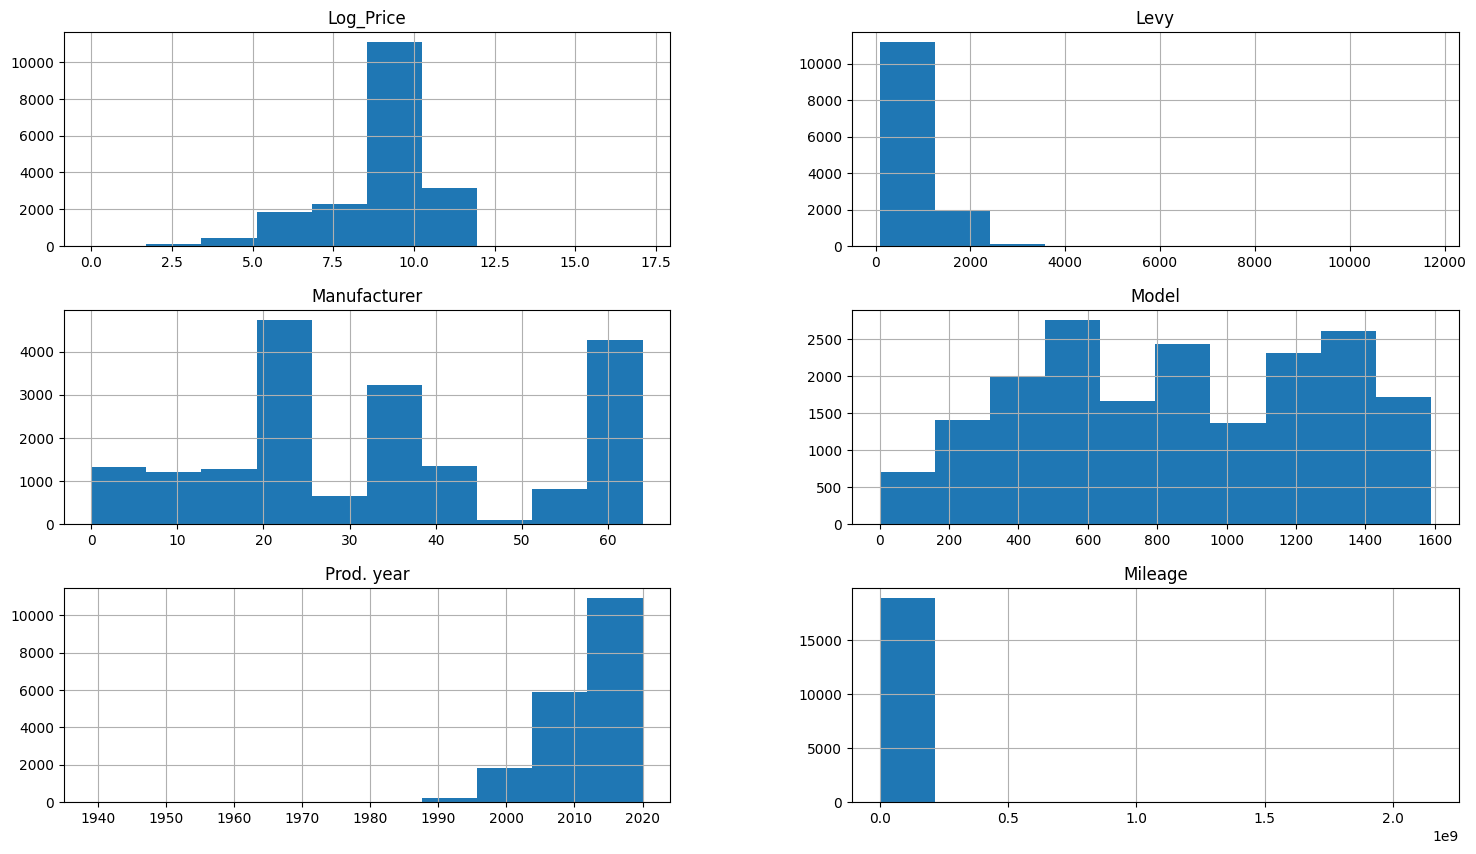

In [18]:

# Plotting histograms of multiple columns together
CarData.hist(['Log_Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
                 'Engine volume', 'Mileage'], figsize=(18,10))


#Step 10: Outlier Analysis

* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.



Since no tail can be observed from histogram, we can assume no outlier is evident and skip this step.

#Step 11:Visualising Data Distribution after outlier removal


* There is no change since no outlier was observed in previous steps.

#Step 12: Missing Values Analysis
Missing values are treated for each column separately.
If a column has more than 30% data missing, then missing value treatment cannot be done.
That column must be rejected because too much information is missing.
Outlined below are some options for treating missing values in data.
Delete the missing value rows if there are only few records
Impute the missing values with MEDIAN value for continuous variables
Impute the missing values with MODE value for categorical variables
Interpolate the values based on nearby values
Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
CarData.isnull().sum()

ID                     0
Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Engine volumes         0
Log_Price              0
dtype: int64

##Observations from Step 12: Missing Value Analysis



# Step 13.1: Feature Selection (Attribute Selection)
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.

This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.

However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get a better sense of data.

Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

**Visual exploration of relationship between variables**

Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

Statistical measurement of relationship strength between variables

Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

Categorical Vs Categorical--- Chi-Square test

**For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**

Continuous Target Variable Vs Continuous Predictor

Continuous Target Variable Vs Categorical Predictor

Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

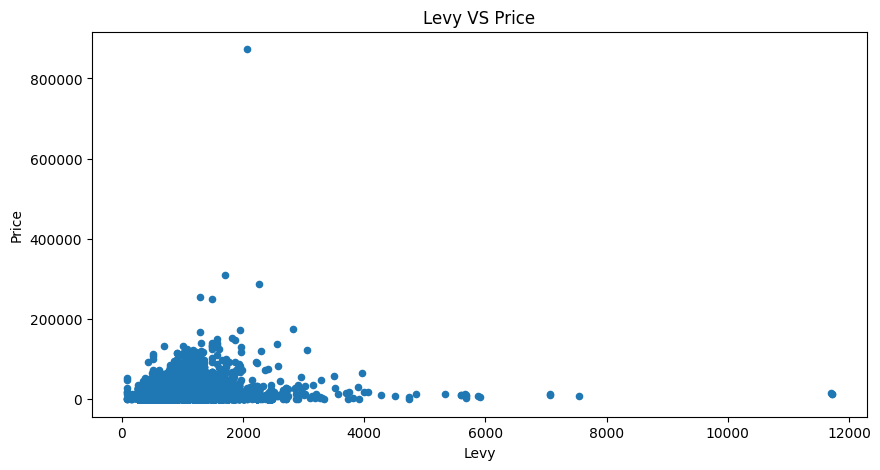

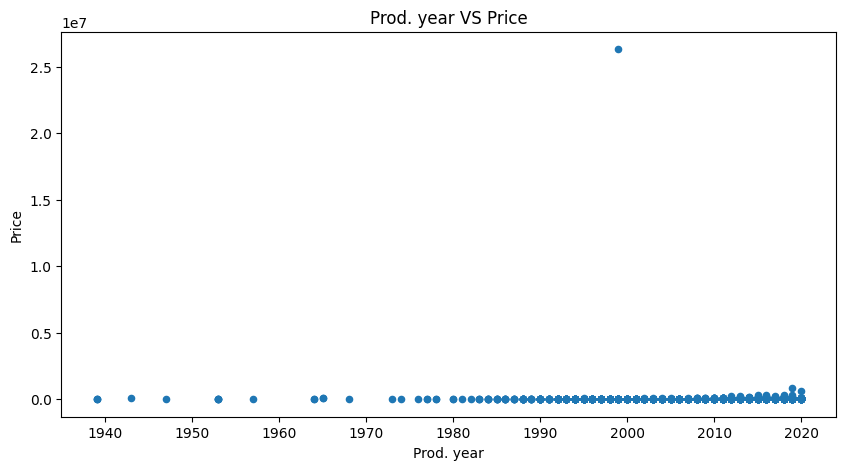

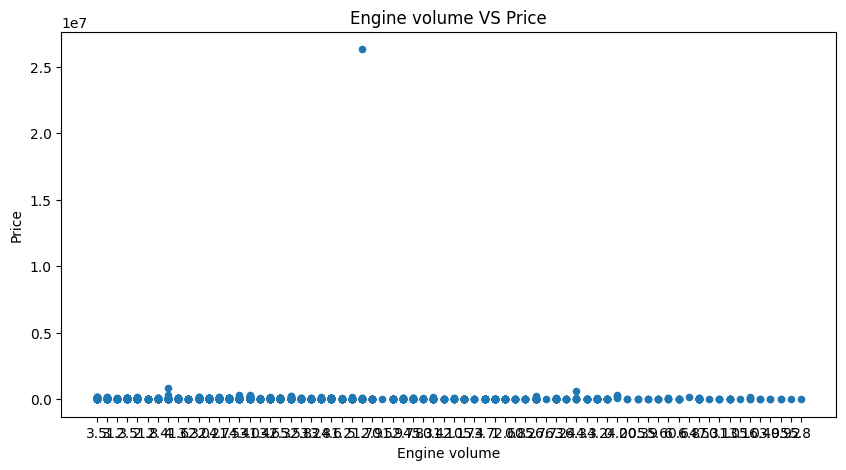

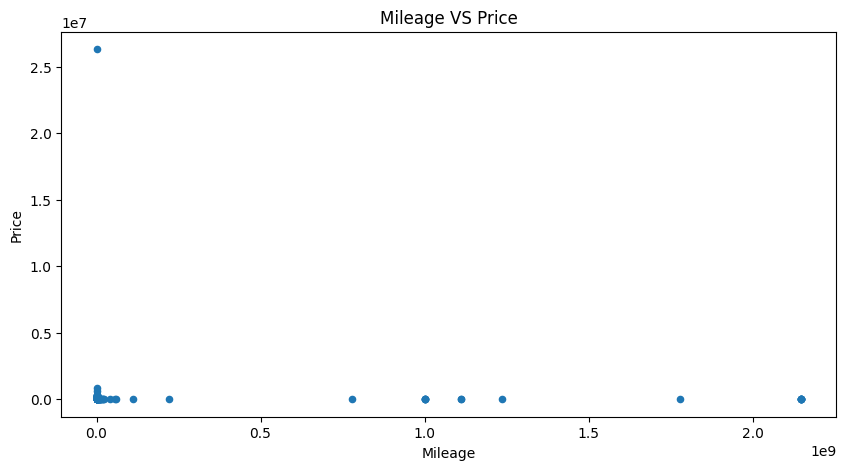

In [19]:
ContinuousCols=['Levy', 'Prod. year', 'Engine volume', 'Mileage']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CarData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

#Step 13.2: Relationship exploration: Continuous Vs Continuous -- Scatter Charts



*   Pearson's correlation coefficient is a powerful metric for doing this.
*italicized text*
*  It can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard deviations (denominator).

*   This value can be calculated only between two numeric columns Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend

*   Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
*   Correlation near {0} means No relationship, the scatter plot will show no clear trend.

*   If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter

*   We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.


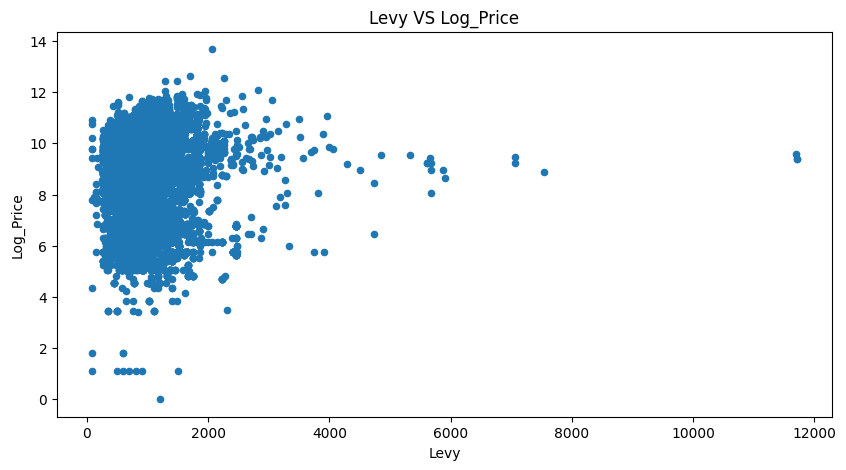

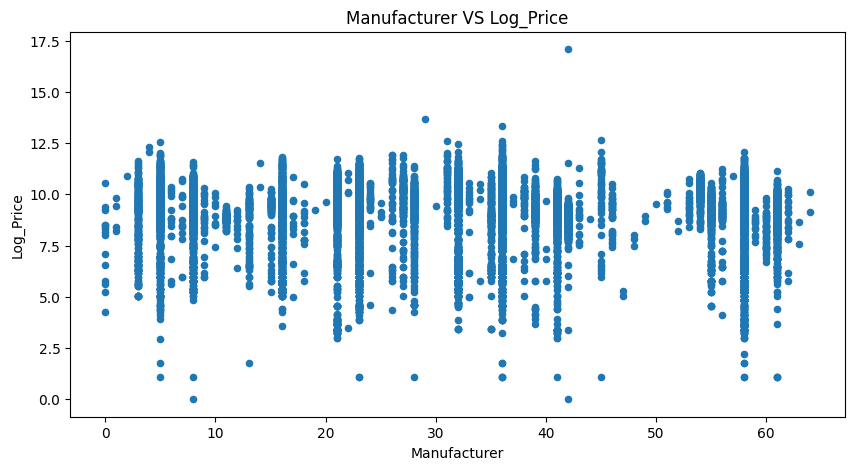

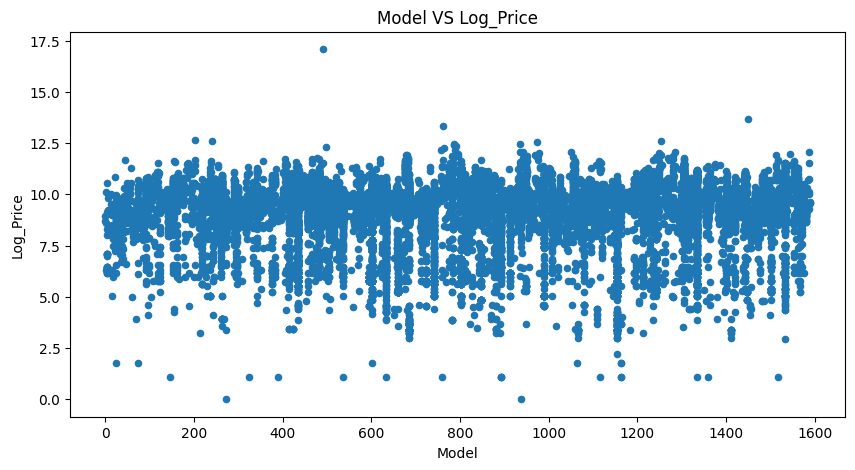

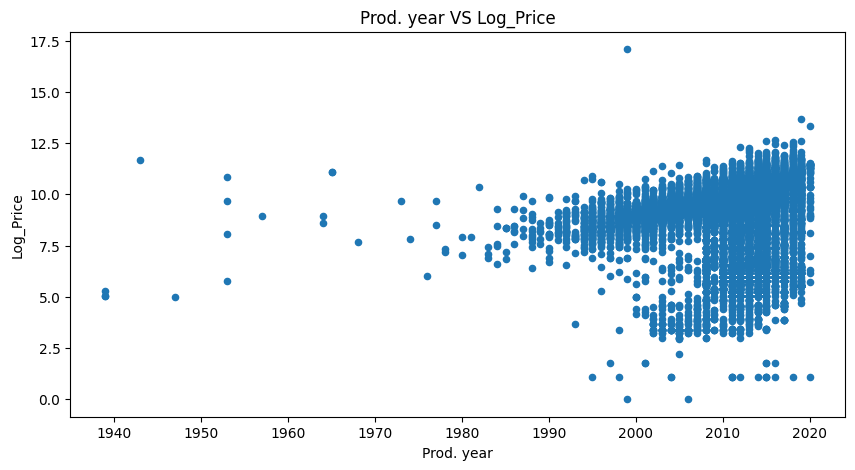

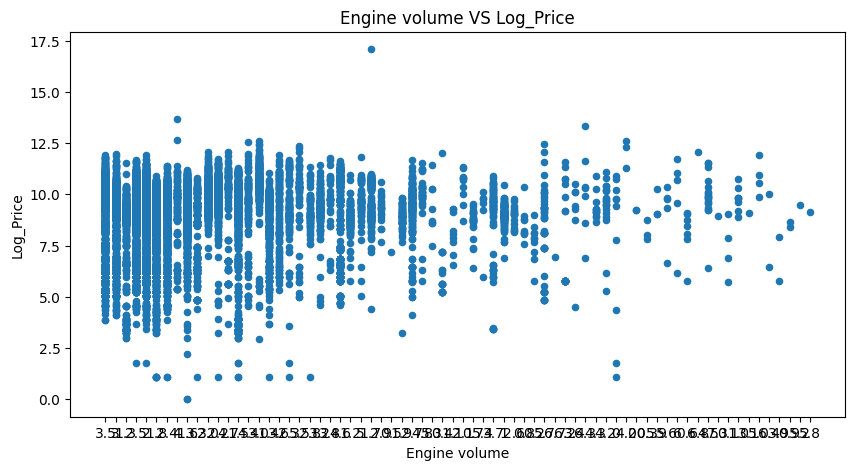

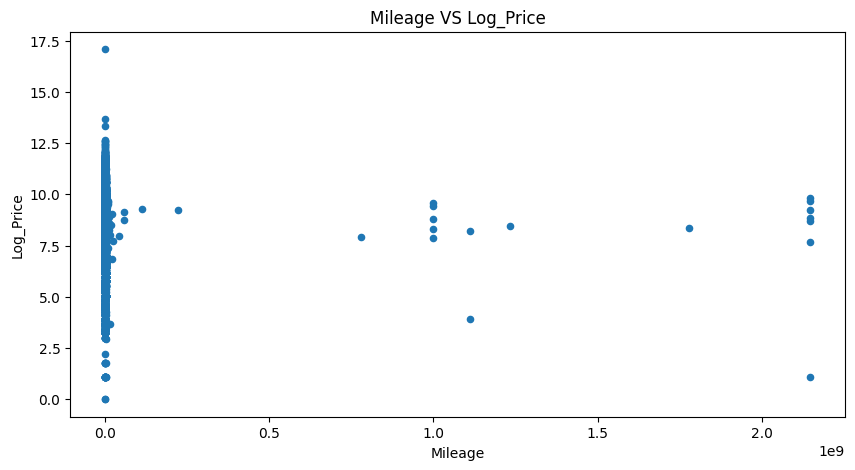

In [20]:
ContinuousCols=[ 'Levy', 'Manufacturer', 'Model', 'Prod. year',
                 'Engine volume', 'Mileage']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CarData.plot.scatter(x = predictor, y='Log_Price', figsize=(10,5),
    title=predictor+" VS "+ 'Log_Price')

#Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

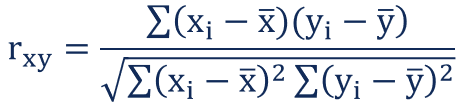


* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
* This value can be calculated only between two numeric columns
Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

In [22]:
# Calculating correlation matrix
ContinuousCols= ['Levy', 'Manufacturer', 'Model', 'Prod. year',
                 'Engine volume', 'Mileage','Price','Log_Price']

# Creating the correlation matrix
CorrelationData=CarData[ContinuousCols].corr()
CorrelationData

,Levy,Manufacturer,Model,Prod. year,Engine volume,Mileage,Price,Log_Price
Levy,1.000000,0.015827,-0.001947,-0.239338,0.647074,0.023746,0.065458,-0.050165
Manufacturer,0.015827,1.000000,-0.017196,-0.051567,-0.041471,0.012553,-0.003567,-0.073253
Model,-0.001947,-0.017196,1.000000,0.064736,0.027045,-0.008184,0.000662,0.054759
Prod. year,-0.239338,-0.051567,0.064736,1.000000,-0.032427,-0.064058,0.012689,0.139161
Engine volume,0.647074,-0.041471,0.027045,-0.032427,1.000000,-0.006292,0.008888,-0.021370
Mileage,0.023746,0.012553,-0.008184,-0.064058,-0.006292,1.000000,-0.001763,-0.019558
Price,0.065458,-0.003567,0.000662,0.012689,0.008888,-0.001763,1.000000,0.103297
Log_Price,-0.050165,-0.073253,0.054759,0.139161,-0.021370,-0.019558,0.103297,1.000000


In [31]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Log_Price'][abs(CorrelationData['Log_Price']) > 0.5]
CorrelationData['Log_Price'][abs(CorrelationData['Log_Price']) > 0.1]


Prod. year    0.139161
Price         0.103297
Log_Price     1.000000
Name: Log_Price, dtype: float64

In [ ]:
Selected: 'Prod. year'

#Step 15: Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots, and
Measure the strength of relation using Anova test.

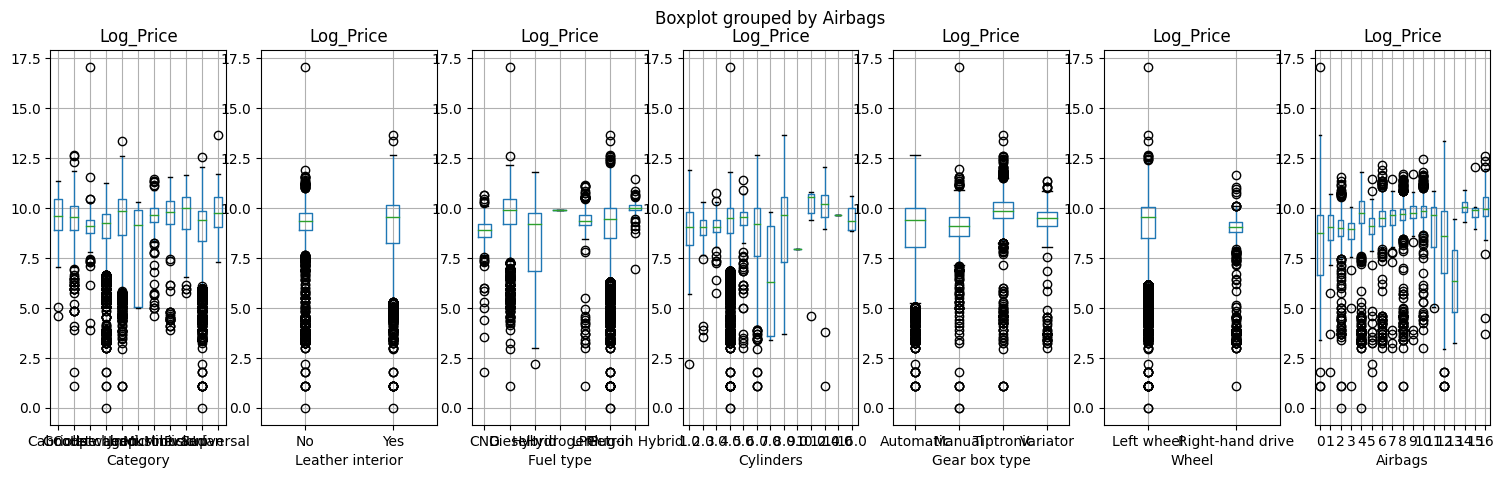

In [24]:
# Box plots for continuous Target Variable "Log_Price" and Categorical predictors
CategoricalColsList=['Category', 'Leather interior', 'Fuel type', 'Cylinders',
                     'Gear box type', 'Wheel', 'Airbags']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CarData.boxplot(column='Log_Price', by=PredictorCol, figsize=(20,20), vert=True, ax=PlotCanvas[i])

**Scatter charts interpretation**
* What should you look for in these scatter charts?

* **Trend.** You should try to see if there is a visible trend or not. There could be three scenarios

* **Increasing Trend**: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML model building!

* **Decreasing Trend:** This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML model building!

* **No Trend**: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that predictor/feature may not be the best one for ML model building.

* Based on this chart we can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value in the next step.

# Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.

The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)

ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [25]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [26]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Category', 'Leather interior', 'Fuel type', 'Cylinders',
                     'Gear box type', 'Wheel', 'Airbags']
FunctionAnova(inpData=CarData,
              TargetVariable='Log_Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Category is correlated with Log_Price | P-Value: 2.0340998516352776e-111
Leather interior is correlated with Log_Price | P-Value: 0.0023164461311674612
Fuel type is correlated with Log_Price | P-Value: 6.514134278477985e-258
Cylinders is correlated with Log_Price | P-Value: 3.715862792186047e-28
Gear box type is correlated with Log_Price | P-Value: 3.0712816086049926e-210
Wheel is correlated with Log_Price | P-Value: 2.975157110189798e-31
Airbags is correlated with Log_Price | P-Value: 0.0


['Category',
 'Leather interior',
 'Fuel type',
 'Cylinders',
 'Gear box type',
 'Wheel',
 'Airbags']

**Observations from Step 16**

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable.

This is something you can guess by looking at the box plots!

Final selected Categorical columns:

**Selecting final Predictors/Features for building Machine Learning/AI model.**

Based on the extensive tests with exploratory data
analysis, we can select the final features/predictors/columns for machine learning model building as:
['Category', 'Leather interior', 'Fuel type', 'Cylinders',
                     'Gear box type', 'Wheel', 'Airbags', 'Prod. year']

In [36]:
SelectedColumns=['Prod. year','Category', 'Leather interior', 'Fuel type', 'Cylinders',
                     'Gear box type', 'Wheel', 'Airbags']

# Selecting final columns
DataForML=CarData[SelectedColumns]
DataForML.head()

,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Wheel,Airbags
0,2010,Jeep,Yes,Hybrid,6.0,Automatic,Left wheel,12
1,2011,Jeep,No,Petrol,6.0,Tiptronic,Left wheel,8
2,2006,Hatchback,No,Petrol,4.0,Variator,Right-hand drive,2
3,2011,Jeep,Yes,Hybrid,4.0,Automatic,Left wheel,0
4,2014,Hatchback,Yes,Petrol,4.0,Automatic,Left wheel,4


In [37]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

#**Step 17: Data Pre-processing for Machine Learning Model Building or Model Development**
List of steps that needs to be performed on predictor variables before data can be used for machine learning

Converting each Ordinal Categorical columns to numeric

Converting Binary nominal Categorical columns to numeric using 1/0 mapping

Converting all other nominal categorical columns to numeric using pd.get_dummies()

Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.

Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data

**Converting the nominal variable to numeric using get_dummies() and converting binary to numeric with 1/10 mapping.**

In [50]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric= pd.get_dummies(DataForML)
DataForML_Numeric['Log_Price']=CarData['Log_Price']

# Printing sample rows
DataForML_Numeric.head()

,Prod. year,Cylinders,Airbags,Category_Cabriolet,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,...,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Wheel_Left wheel,Wheel_Right-hand drive,Log_Price
0,2010,6.0,12,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,9.497622
1,2011,6.0,8,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,9.718422
2,2006,4.0,2,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,True,9.043932
3,2011,4.0,0,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,8.190632
4,2014,4.0,4,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,9.369564


#Step 18: Machine Learning Model Development:
Splitting the data into Training and Testing sample
We dont use the full data for creating the model (training data).

Some data is randomly selected and kept aside for checking how good the model is.

This is known as Testing Data and the remaining data is called Training data on which the model is built.

Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [41]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Prod. year', 'Cylinders', 'Airbags', 'Category_Cabriolet',
       'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback',
       'Category_Jeep', 'Category_Limousine', 'Category_Microbus',
       'Category_Minivan', 'Category_Pickup', 'Category_Sedan',
       'Category_Universal', 'Leather interior_No', 'Leather interior_Yes',
       'Fuel type_CNG', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Automatic',
       'Gear box type_Manual', 'Gear box type_Tiptronic',
       'Gear box type_Variator', 'Wheel_Left wheel', 'Wheel_Right-hand drive',
       'Log_Price'],
      dtype='object')

In [56]:
#Separate Target Variable and Predictor Variables
TargetVariable='Log_Price'
Predictors=(['Prod. year', 'Cylinders', 'Airbags', 'Category_Cabriolet',
       'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback',
       'Category_Jeep', 'Category_Limousine', 'Category_Microbus',
       'Category_Minivan', 'Category_Pickup', 'Category_Sedan',
       'Category_Universal', 'Leather interior_No', 'Leather interior_Yes',
       'Fuel type_CNG', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Automatic',
       'Gear box type_Manual', 'Gear box type_Tiptronic',
       'Gear box type_Variator', 'Wheel_Left wheel', 'Wheel_Right-hand drive',
       ])

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

#Step 19: Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [57]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13246, 29)
(13246,)
(5678, 29)
(5678,)


#Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [60]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Log_Price']-TestingDataResults['PredictedLog_Price']))/TestingDataResults['Log_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.19779783800457773

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Cylinders  Airbags  Category_Cabriolet  Category_Coupe  \
0    0.913580   0.200000    0.250                 0.0             0.0   
1    0.913580   0.200000    0.750                 0.0             0.0   
2    0.938272   0.200000    0.250                 0.0             0.0   
3    0.765432   0.200000    0.500                 0.0             0.0   
4    0.728395   0.333333    0.125                 0.0             0.0   

   Category_Goods wagon  Category_Hatchback  Category_Jeep  \
0                   0.0                 0.0            0.0   
1                   0.0                 0.0            0.0   
2                   0.0                 0.0            0.0   
3                   0.0                 1.0            0.0   
4                   0.0                 0.0            0.0   

   Category_Limousine  Category_Microbus  ...  Fuel type_Petrol  \
0          

<ipython-input-60-fd8fba947a28>:42: RuntimeWarning: divide by zero encountered in divide
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))



Accuracy values for 10-fold Cross Validation:
 [ 8.48014208e+01  8.61671929e+01  8.52766173e+01  8.49520771e+01
            -inf  8.58789955e+01 -2.17245383e+11  8.46369098e+01
            -inf  8.60899727e+01]

Final Average Accuracy of the model: -inf


<ipython-input-60-fd8fba947a28>:42: RuntimeWarning: divide by zero encountered in divide
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))


#Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.3970760911337404

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Cylinders  Airbags  Category_Cabriolet  Category_Coupe  \
0    0.913580   0.200000    0.250                 0.0             0.0   
1    0.913580   0.200000    0.750                 0.0             0.0   
2    0.938272   0.200000    0.250                 0.0             0.0   
3    0.765432   0.200000    0.500                 0.0             0.0   
4    0.728395   0.333333    0.125                 0.0             0.0   

   Category_Goods wagon  Category_Hatchback  Category_Jeep  \
0                   0.0                 0.0            0.0   
1                   0.0                 0.0            0.0   
2                   0.0                 0.0            0.0   
3                   0.0                 1.0            0.0   
4                   0.0                 0.0            0.0   

   Category_Limousine  Category_Micro

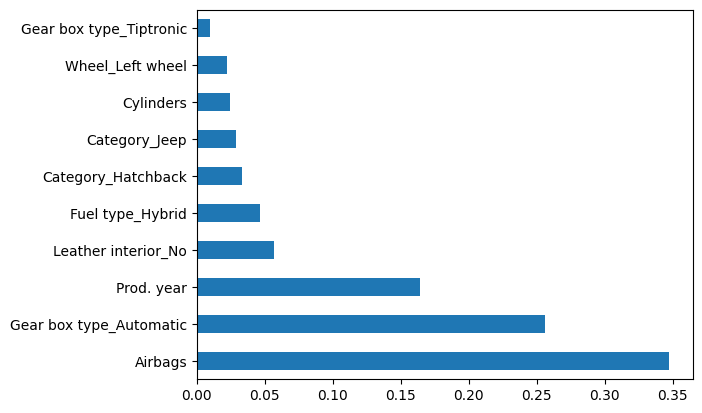

In [80]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Log_Price']-TestingDataResults['PredictedLog_Price']))/TestingDataResults['Log_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Define the Accuracy_Score function to handle zero values
def Accuracy_Score(orig, pred):
    # Filter out zero values from the original data
    non_zero_indices = np.where(orig != 0)
    orig_non_zero = orig[non_zero_indices]
    pred_non_zero = pred[non_zero_indices]

    # Calculate MAPE using non-zero values
    if len(orig_non_zero) > 0:
        MAPE = np.mean(100 * (np.abs(orig_non_zero - pred_non_zero) / orig_non_zero))
        return (100 - MAPE)
    else:
        # Handle the case where all original values are zero
        return np.nan  # Return NaN or any appropriate value indicating undefined accuracy

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)

# Print Accuracy values for 10-fold Cross Validation
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(np.nanmean(Accuracy_Values), 2))

#Plotting/Visualising the Decision Tree


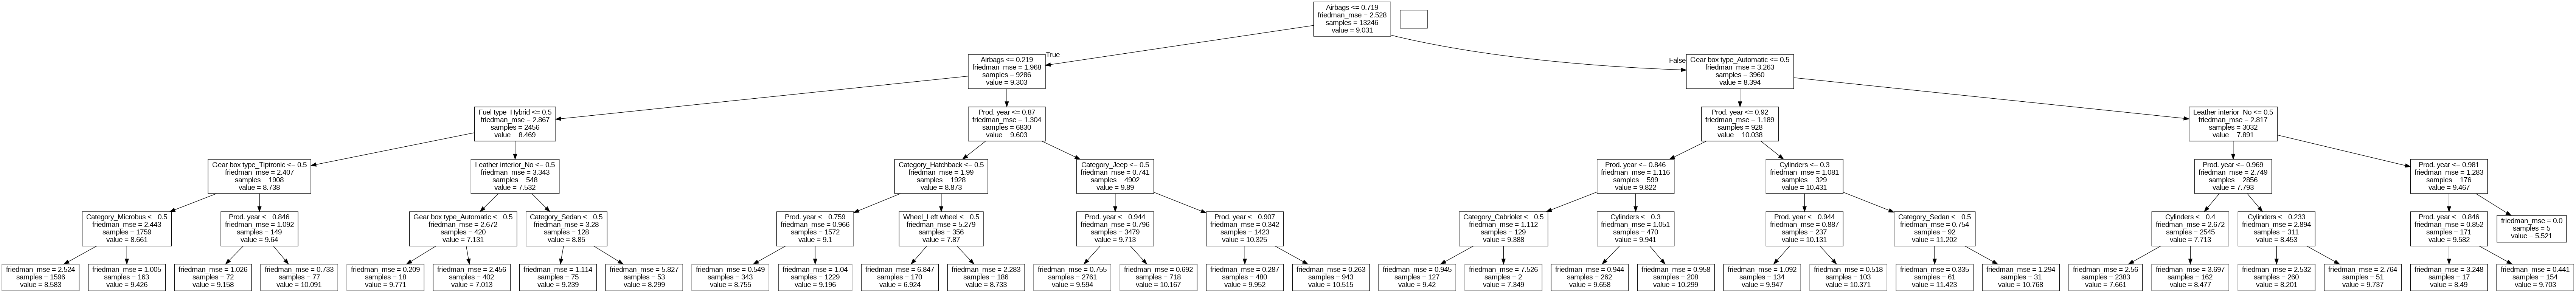

In [81]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.2082688899921037

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Cylinders  Airbags  Category_Cabriolet  Category_Coupe  \
0    0.913580   0.200000    0.250                 0.0             0.0   
1    0.913580   0.200000    0.750                 0.0             0.0   
2    0.938272   0.200000    0.250                 0.0             0.0   
3    0.765432   0.200000    0.500                 0.0             0.0   
4    0.728395   0.333333    0.125                 0.0             0.0   

   Category_Goods wagon  Category_Hatchback  Category_Jeep  \
0                   0.0                 0.0            0.0   
1                   0.0                 0.0            0.0   
2                   0.0                 0.0            0.0   
3                   0.0                 1.0            0.0   
4                   0.0                 0.0            0.0   

   Category_Limousine  Category_Microbus  ...  Fuel type_Petrol  \
0                 0.0          

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
<ipython-input-71-df65c4d13726>:52: RuntimeWarning


Accuracy values for 10-fold Cross Validation:
 [84.8630979  86.03503497 85.33226502 84.88196273        -inf 85.74102019
 85.25043083 84.39936944        -inf 85.84941053]

Final Average Accuracy of the model: -inf


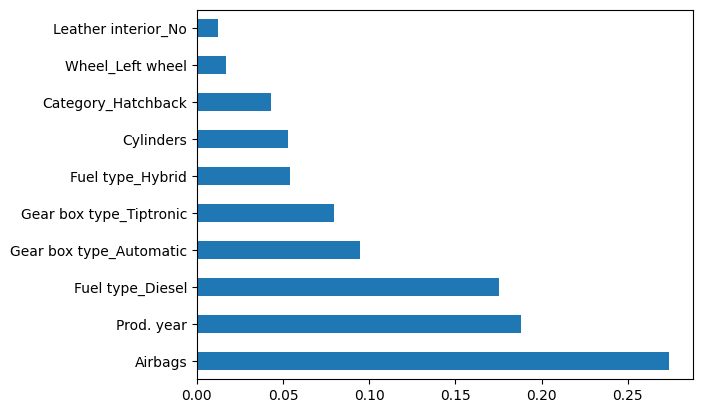

In [71]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Log_Price']-TestingDataResults['PredictedLog_Price']))/TestingDataResults['Log_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:11:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.4357516842661179

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Cylinders  Airbags  Category_Cabriolet  Category_Coupe  \
0    0.913580   0.200000    0.250                 0.0             0.0   
1    0.913580   0.200000    0.750                 0.0             0.0   
2    0.938272   0.200000    0.250                 0.0             0.0   
3    0.765432   0.200000    0.500                 0.0             0.0   
4    0.728395   0.333333    0.125                 0.0             0.0   

   Category_Goods wagon  Category_Hatchback  Category_Jeep  \
0                   0.0                 0.0            0.0   
1                   0.0                 0.0            0.0   
2                   0.0                 0.0            0.0   
3                   0.0                 1.0            0.0   
4                   0.0                 0.0            0.0   

   Category_Limousine  Category_Microbus  ...  Fuel type_Petrol  \
0                 0.0          

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:11:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:11:24] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:11:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:11:26] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [87.8212689  89.29849411 88.35911608 88.03124799 88.77499755 88.69054094
 88.69990477 87.67879987 88.56496264 88.74293608]

Final Average Accuracy of the model: 88.47


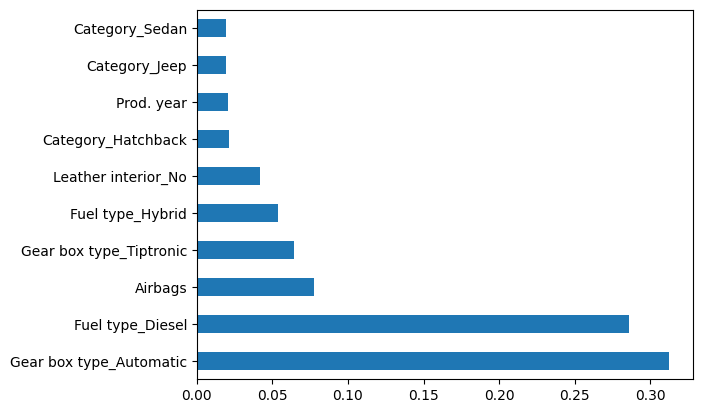

In [79]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Log_Price']-TestingDataResults['PredictedLog_Price']))/TestingDataResults['Log_Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Define the Accuracy_Score function to handle zero values
def Accuracy_Score(orig, pred):
    # Filter out zero values from the original data
    non_zero_indices = np.where(orig != 0)
    orig_non_zero = orig[non_zero_indices]
    pred_non_zero = pred[non_zero_indices]

    # Calculate MAPE using non-zero values
    if len(orig_non_zero) > 0:
        MAPE = np.mean(100 * (np.abs(orig_non_zero - pred_non_zero) / orig_non_zero))
        return (100 - MAPE)
    else:
        # Handle the case where all original values are zero
        return np.nan  # Return NaN or any appropriate value indicating undefined accuracy

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)

# Print Accuracy values for 10-fold Cross Validation
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(np.nanmean(Accuracy_Values), 2))


<Axes: >

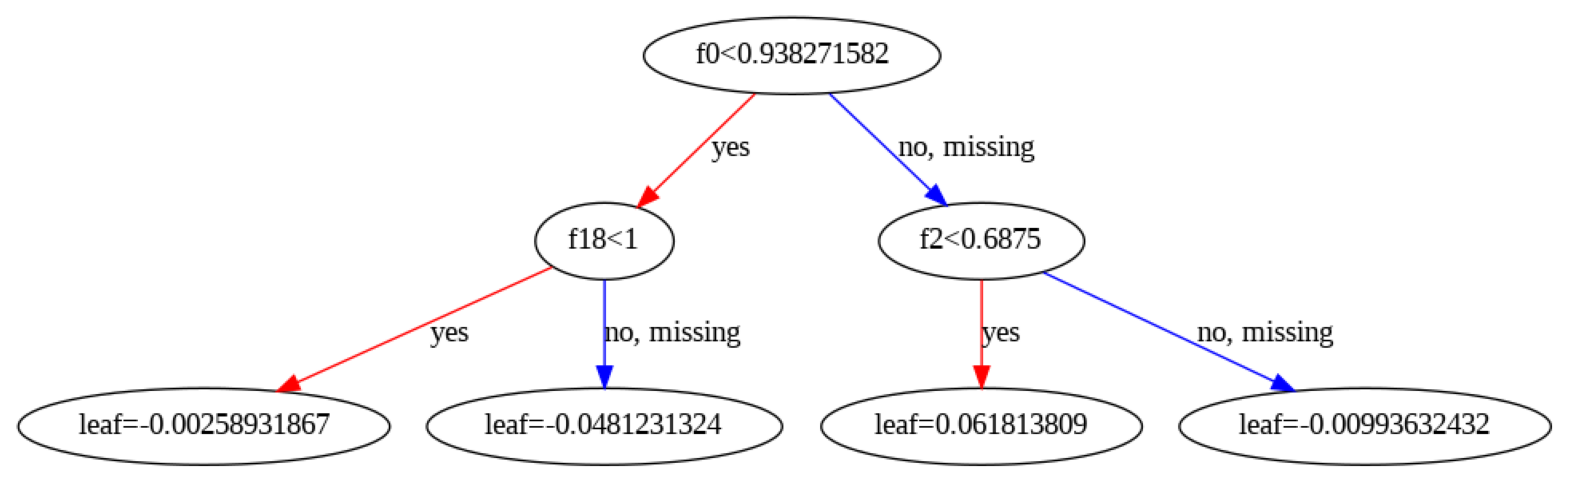

In [72]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

#Support Vector Machine (SVM) Regressor

In [78]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Log_Price']-TestingDataResults['PredictedLog_Price']))/TestingDataResults['Log_Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Make sure there are no zeros in the Target variable if you are using MAPE
# Define the Accuracy_Score function to handle zero values
def Accuracy_Score(orig, pred):
    # Filter out zero values from the original data
    non_zero_indices = np.where(orig != 0)
    orig_non_zero = orig[non_zero_indices]
    pred_non_zero = pred[non_zero_indices]

    # Calculate MAPE using non-zero values
    if len(orig_non_zero) > 0:
        MAPE = np.mean(100 * (np.abs(orig_non_zero - pred_non_zero) / orig_non_zero))
        return (100 - MAPE)
    else:
        # Handle the case where all original values are zero
        return np.nan  # Return NaN or any appropriate value indicating undefined accuracy

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Define your model (e.g., DecisionTreeRegressor)
RegModel = DecisionTreeRegressor(max_depth=5, criterion='friedman_mse')

# Run 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)

# Print Accuracy values for 10-fold Cross Validation
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(np.nanmean(Accuracy_Values), 2))

SVR(C=50, gamma=0.01)
R2 Value: 0.2518948453057144

##### Model Validation and Accuracy Calculations ##########
   Prod. year  Cylinders  Airbags  Category_Cabriolet  Category_Coupe  \
0    0.913580   0.200000    0.250                 0.0             0.0   
1    0.913580   0.200000    0.750                 0.0             0.0   
2    0.938272   0.200000    0.250                 0.0             0.0   
3    0.765432   0.200000    0.500                 0.0             0.0   
4    0.728395   0.333333    0.125                 0.0             0.0   

   Category_Goods wagon  Category_Hatchback  Category_Jeep  \
0                   0.0                 0.0            0.0   
1                   0.0                 0.0            0.0   
2                   0.0                 0.0            0.0   
3                   0.0                 1.0            0.0   
4                   0.0                 0.0            0.0   

   Category_Limousine  Category_Microbus  ...  Fuel type_Petrol  \
0        

#Step 21: Model Deployment
Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing XGboost as the final model it has the highest accuracy!

In order to deploy the model we follow steps outlined next.

Train/Build the model again using 100% data available

Save the model as a serialized file which can be stored anywhere.

Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

Choosing only the most important variables

Its beneficial to keep lesser number of predictors for the model while deploying it in production.

The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns/features).

For this dataset, the most important predictor variables are 'Prod. year','Cylinders','Airbags'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [82]:
# Separate Target Variable and Predictor Variables
TargetVariable='Log_Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Prod. year','Cylinders','Airbags']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(18924, 3)
(18924,)


#Cross validating the final model accuracy with less predictors

In [85]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [85.92068133 87.23188374 86.68863725 85.65398797 86.56668325 86.86028556
 86.62519294 85.31305725 86.67616682 87.01761   ]

Final Average Accuracy of the model: 86.46


#Step 22: Retraining the final model using 100% data

In [87]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#Step 23: Save the model as a serialized file which can be stored anywhere

In [88]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


#Step 24: Create a python function

In [91]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Prod. year','Cylinders','Airbags']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

#Step 25: Calling the function for some new data

In [93]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[4.98,6.575,15.3],[4.98,3.2,10.3]],columns=['LSTAT', 'RM', 'PTRATIO'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   LSTAT     RM  PTRATIO
0   4.98  6.575     15.3
1   4.98  3.200     10.3


,Prediction
0,9.426968
1,9.426968


**Conclusion**




*   The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
*   Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks in the platform /system.



**Deploying a predictive model as an API**

Django and flask are two popular ways to deploy predictive models as a web service
You can call your predictive models using a URL from any front end like tableau, java or angular js

#Deploying the model with few parameters
#Function for predictions API

In [94]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_LSTAT , inp_RM, inp_PTRATIO):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_LSTAT , inp_RM, inp_PTRATIO]],
     columns=['LSTAT', 'RM', 'PTRATIO'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_LSTAT=4.98,
                           inp_RM=6.5,
                           inp_PTRATIO=15.3
                             )

'{"Prediction":{"0":9.4269676208}}'

#**Web Deployment using Flask Library/Package**
**Installing the flask library required to create the API**

In [95]:
!pip install flask

#Creating Flask API

In [96]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [97]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        LSTAT_value = float(request.args.get('LSTAT'))
        RM_value=float(request.args.get('RM'))
        PTRATIO_value=float(request.args.get('PTRATIO'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_LSTAT=LSTAT_value,
                                                       inp_RM=RM_value,
                                                       inp_PTRATIO=PTRATIO_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

#Starting the API engine


In [100]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


#**Desktop App deployment: Tkinter package**


In [103]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


class CarPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Car Price Prediction')
        self.data = pd.read_csv('car_price_prediction.csv')
        self.sliders = []

        self.X = self.data.drop('Price', axis=1).values
        self.y = self.data['Price'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted Car price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = CarPricePredictionApp(root)
    root.mainloop()


TclError: no display name and no $DISPLAY environment variable

**#END OF CAPSTONE PROJECT**
With Good hopes